# **Kütüphaneler**

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# **Data**

In [50]:
df = pd.read_csv("/content/drive/MyDrive/Colab çalışma/Neıman/IMDB/IMDB Dataset.csv")

In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [52]:
unique_labels = df['sentiment'].unique()
for i in unique_labels:
  print(i)

positive
negative


In [53]:
# Eksik değerleri kontrol edin
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


In [54]:
# Gerekli olmadığı için eksik değerlerin bulunduğu satırları kaldırın (eğer varsa)
df.dropna(inplace=True)

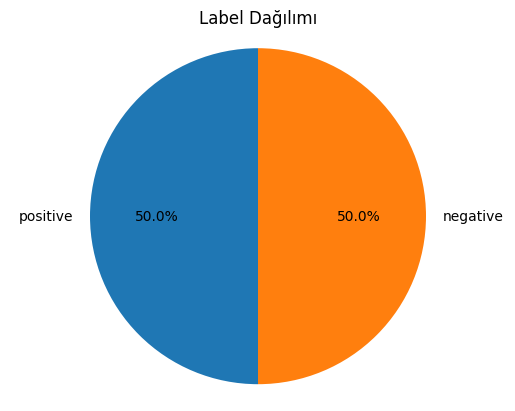

In [55]:
# Labels sütununun değerine göre sayıları
label_counts = df["sentiment"].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Label Dağılımı")
plt.show()

In [56]:
# 'sentiment' kolonunu numerik değerlere çevirin
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [57]:
# TF-IDF Vektörizer kullanarak metin verisini sayısal verilere dönüştürün
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [58]:
# TF-IDF Vektörizer kullanarak metin verisini sayısal verilere dönüştürün
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [59]:
# Lojistik Regresyon modelini kullanarak eğitin
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [60]:
# Test veri seti üzerinde tahmin yapın
y_pred = model.predict(X_test_vec)

# Model performansını değerlendirin
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8959
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

